<a href="https://colab.research.google.com/github/joseortegalabra/MLBI/blob/master/Tarea1_MLBI_Jos%C3%A9_Ignacio_Ortega_Labra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip list
#!pip freeze
#!pip show pandas numpy tensorflow matplotlib sklearn

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as kr
from sklearn.model_selection import train_test_split
from platform import python_version
from sklearn.preprocessing import MinMaxScaler

In [3]:
print('Version de python: ',python_version())
print('Version numpy:', np.__version__)
print('Version pandas:', pd.__version__)
print('Version tensorflow:', tf.__version__)
#print('Version sklearn:', sklearn.__version__)

Version de python:  3.6.9
Version numpy: 1.18.3
Version pandas: 1.0.3
Version tensorflow: 2.2.0-rc3


In [0]:
#!git clone https://github.com/joseortegalabra/MLBI.git

## Pregunta 1

#### Exploración base de datos

In [53]:
path1 = 'https://raw.githubusercontent.com/joseortegalabra/MLBI/master/Tarea1/dataset1.xlsx'
data1 = pd.read_excel(path1)
data1.head()

,crr_Nom,psu_Nem,psu_Leng,psu_Mate,psu_Cie,psu_Pond,Longitud,Latitud,cred_apr,distancia,F,M,PARTICULAR_SUBVENCIONADO,PARTICULAR_PAGADO,MUNICIPAL,cluster
0,INGENIERIA CIVIL INDUSTRIAL,783,653,685,672,735,-73.16487,-36.978759,38,20.201244,1,0,1,0,0,C2
1,INGENIERIA CIVIL BIOMEDICA,799,705,713,686,756,-73.16487,-36.978759,36,20.201244,1,0,1,0,0,C1
2,INGENIERIA CIVIL QUIMICA,688,543,612,534,638,-73.16487,-36.978759,36,20.201244,1,0,1,0,0,C3
3,INGENIERIA CIVIL ELECTRICA,605,598,658,601,633,-73.16487,-36.978759,21,20.201244,0,1,1,0,0,C2
4,INGENIERIA CIVIL INFORMATICA,603,710,668,651,657,-73.16487,-36.978759,19,20.201244,0,1,1,0,0,C2


In [54]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7866 entries, 0 to 7865
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   crr_Nom                   7866 non-null   object 
 1   psu_Nem                   7866 non-null   int64  
 2   psu_Leng                  7866 non-null   int64  
 3   psu_Mate                  7866 non-null   int64  
 4   psu_Cie                   7866 non-null   int64  
 5   psu_Pond                  7866 non-null   int64  
 6   Longitud                  7866 non-null   float64
 7   Latitud                   7866 non-null   float64
 8   cred_apr                  7866 non-null   int64  
 9   distancia                 7866 non-null   float64
 10  F                         7866 non-null   int64  
 11  M                         7866 non-null   int64  
 12  PARTICULAR_SUBVENCIONADO  7866 non-null   int64  
 13  PARTICULAR_PAGADO         7866 non-null   int64  
 14  MUNICIPA

La base de datos tiene 15 características, no tiene ningún valor nulo y todos los datos son del tipo numérico a excepción de crr_Nom (Nombre de la carerra estudiada) y cluster (señal a aprender, clasificación del cluster de cada estudiante)


En primer lugar dividir la base de datos en entrenamiento y testeo para evitar errores data Leakage

In [55]:
data1['cluster'].value_counts()

C2    3631
C3    1773
C1    1332
C4    1130
Name: cluster, dtype: int64

In [56]:
data1['crr_Nom'].value_counts()

INGENIERIA CIVIL - PLAN COMUN             1010
INGENIERIA CIVIL INDUSTRIAL                795
INGENIERIA CIVIL BIOMEDICA                 651
INGENIERIA CIVIL METALURGICA               614
INGENIERIA CIVIL                           604
INGENIERIA CIVIL QUIMICA                   600
INGENIERIA CIVIL INFORMATICA               563
INGENIERIA CIVIL ELECTRONICA               548
INGENIERIA CIVIL MECANICA                  543
INGENIERIA CIVIL EN TELECOMUNICACIONES     536
INGENIERIA CIVIL DE MATERIALES             483
INGENIERIA CIVIL ELECTRICA                 480
INGENIERÍA CIVIL DE MINAS                  263
INGENIERIA CIVIL AEROESPACIAL              176
Name: crr_Nom, dtype: int64

#### Ajustar base de datos a formato numérico

In [57]:
#crear datos dummy
def createDummies(df, var, prefijo):
  '''
  input dataframe y un string con EL nombre de la variable a eliminar y nombre del prefijo que quiero que aparesca
  en formato string
  '''
  dummy = pd.get_dummies(df[var], prefix = prefijo)
  df = df.drop(var, axis = 1)
  df = pd.concat([df, dummy], axis = 1)
  return df

data1 = createDummies(data1,'crr_Nom', 'crr')
data1.head()

,psu_Nem,psu_Leng,psu_Mate,psu_Cie,psu_Pond,Longitud,Latitud,cred_apr,distancia,F,M,PARTICULAR_SUBVENCIONADO,PARTICULAR_PAGADO,MUNICIPAL,cluster,crr_INGENIERIA CIVIL,crr_INGENIERIA CIVIL - PLAN COMUN,crr_INGENIERIA CIVIL AEROESPACIAL,crr_INGENIERIA CIVIL BIOMEDICA,crr_INGENIERIA CIVIL DE MATERIALES,crr_INGENIERIA CIVIL ELECTRICA,crr_INGENIERIA CIVIL ELECTRONICA,crr_INGENIERIA CIVIL EN TELECOMUNICACIONES,crr_INGENIERIA CIVIL INDUSTRIAL,crr_INGENIERIA CIVIL INFORMATICA,crr_INGENIERIA CIVIL MECANICA,crr_INGENIERIA CIVIL METALURGICA,crr_INGENIERIA CIVIL QUIMICA,crr_INGENIERÍA CIVIL DE MINAS
0,783,653,685,672,735,-73.16487,-36.978759,38,20.201244,1,0,1,0,0,C2,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,799,705,713,686,756,-73.16487,-36.978759,36,20.201244,1,0,1,0,0,C1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,688,543,612,534,638,-73.16487,-36.978759,36,20.201244,1,0,1,0,0,C3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,605,598,658,601,633,-73.16487,-36.978759,21,20.201244,0,1,1,0,0,C2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,603,710,668,651,657,-73.16487,-36.978759,19,20.201244,0,1,1,0,0,C2,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [58]:
#cluster en forma numérica
def n_cluster(row):
  if row == 'C1':
    return 1
  elif row == 'C2':
    return 2
  elif row == 'C3':
    return 3
  else:
    return 4

#data1['cluster'].map(n_cluster)
data1.loc[:, 'cluster'] = data1['cluster'].map(n_cluster)
data1.head()

,psu_Nem,psu_Leng,psu_Mate,psu_Cie,psu_Pond,Longitud,Latitud,cred_apr,distancia,F,M,PARTICULAR_SUBVENCIONADO,PARTICULAR_PAGADO,MUNICIPAL,cluster,crr_INGENIERIA CIVIL,crr_INGENIERIA CIVIL - PLAN COMUN,crr_INGENIERIA CIVIL AEROESPACIAL,crr_INGENIERIA CIVIL BIOMEDICA,crr_INGENIERIA CIVIL DE MATERIALES,crr_INGENIERIA CIVIL ELECTRICA,crr_INGENIERIA CIVIL ELECTRONICA,crr_INGENIERIA CIVIL EN TELECOMUNICACIONES,crr_INGENIERIA CIVIL INDUSTRIAL,crr_INGENIERIA CIVIL INFORMATICA,crr_INGENIERIA CIVIL MECANICA,crr_INGENIERIA CIVIL METALURGICA,crr_INGENIERIA CIVIL QUIMICA,crr_INGENIERÍA CIVIL DE MINAS
0,783,653,685,672,735,-73.16487,-36.978759,38,20.201244,1,0,1,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,799,705,713,686,756,-73.16487,-36.978759,36,20.201244,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,688,543,612,534,638,-73.16487,-36.978759,36,20.201244,1,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,605,598,658,601,633,-73.16487,-36.978759,21,20.201244,0,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,603,710,668,651,657,-73.16487,-36.978759,19,20.201244,0,1,1,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Separar en entrenamiento y test

In [0]:
#columnas
features = list(set(data1.columns.tolist())-set(['cluster']))
X_train, X_test, y_train, y_test = train_test_split(data1[features], data1['cluster'], test_size = 0.2, random_state = 0)

In [60]:
#tamaño sets
print('Tamaño data entrenamiento X:', X_train.shape)
print('Tamaño data entrenamiento y:', y_train.shape)
print('Tamaño data test X:', X_test.shape)
print('Tamaño data test y:', y_test.shape)

Tamaño data entrenamiento X: (6292, 28)
Tamaño data entrenamiento y: (6292,)
Tamaño data test X: (1574, 28)
Tamaño data test y: (1574,)


In [0]:
#min max scaler de los datos
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

#### Prueba regresion logística en sklean

In [0]:
from sklearn.linear_model import LogisticRegression

In [72]:
lr = LogisticRegression(random_state = None)
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
lr.predict(X_train)

array([2, 2, 2, ..., 2, 2, 2])

In [76]:
lr.predict_proba(X_train)

array([[8.32738417e-03, 7.92718601e-01, 1.30162354e-01, 6.87916603e-02],
       [3.17138190e-01, 6.78975694e-01, 3.84127403e-03, 4.48416112e-05],
       [3.20287306e-02, 7.87479177e-01, 1.75653892e-01, 4.83820060e-03],
       ...,
       [5.17586390e-02, 9.37441645e-01, 1.04942851e-02, 3.05430881e-04],
       [1.19769745e-01, 8.36338758e-01, 4.38367736e-02, 5.47229989e-05],
       [9.34506396e-03, 4.74923411e-01, 4.24896668e-01, 9.08348571e-02]])

In [98]:
print ('Accurancy set entrenamiento: {:.5f}'.format(lr.score(X_train, y_train)))
print ('Accurancy set testeo: {:.5f}'.format(lr.score(X_test, y_test)))

Accurancy set entrenamiento: 0.79673
Accurancy set testeo: 0.79543


In [112]:
#f1 score
from sklearn.metrics import f1_score
print('F1 score conjunto de entrenamiento')
print('Macro:', f1_score(y_train, lr.predict(X_train), average='macro'))
print('Micro:', f1_score(y_train, lr.predict(X_train), average='micro'))
print('Weighted:', f1_score(y_train, lr.predict(X_train), average='weighted'))
print('De cada clase:', f1_score(y_train, lr.predict(X_train), average=None))

F1 score conjunto de entrenamiento
Macro: 0.7800689362037607
Micro: 0.7967260012714558
Weighted: 0.7954516091955631
De cada clase: [0.79842675 0.84131487 0.72674838 0.75378575]


In [113]:
print('F1 score conjunto de entrenamiento')
print('Macro:', f1_score(y_test, lr.predict(X_test), average='macro'))
print('Micro:', f1_score(y_test, lr.predict(X_test), average='micro'))
print('Weighted:', f1_score(y_test, lr.predict(X_test), average='weighted'))
print('De cada clase:', f1_score(y_test, lr.predict(X_test), average=None))

F1 score conjunto de entrenamiento
Macro: 0.7743831545806533
Micro: 0.795425667090216
Weighted: 0.7935682292316109
De cada clase: [0.80851064 0.84365029 0.71893491 0.72643678]


In [126]:
#matriz de confusión
from sklearn.metrics import confusion_matrix
print('Matriz de confusión TRAIN\n')
confusion_matrix(y_train, lr.predict(X_train))

Matriz de confusión TRAIN



array([[ 812,  278,    0,    0],
       [ 132, 2521,  186,   37],
       [   0,  244, 1008,  162],
       [   0,   74,  166,  672]])

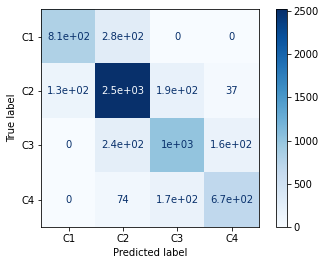

In [127]:
from sklearn.metrics import plot_confusion_matrix
etiqueta_cluster = ['C1', 'C2', 'C3', 'C4']
#agrandar grafico
plot_confusion_matrix(lr, X_train, y_train,
                                 display_labels=etiqueta_cluster,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

In [130]:
print('Matris de confusión TEST\n')
confusion_matrix(y_test, lr.predict(X_test))

Matris de confusión TEST



array([[190,  52,   0,   0],
       [ 38, 661,  38,  18],
       [  0,  75, 243,  41],
       [  0,  24,  36, 158]])

Matriz de confusión TEST normalizada


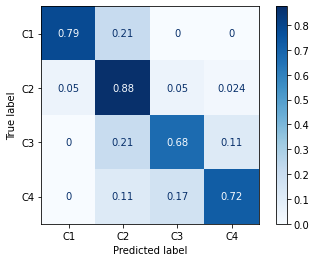

In [141]:
print('Matriz de confusión TEST normalizada')
etiqueta_cluster = ['C1', 'C2', 'C3', 'C4']
#agrandar grafico
plot_confusion_matrix(lr, X_test, y_test,
                                 display_labels=etiqueta_cluster,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
#normalizada puede ser true, pred, all, None

#### Usando TF 2

In [143]:
#haciendo todo el preprocesamiento y obteniendo las bases de datos de entrenamiento y test
print('Tamaño data entrenamiento X:', X_train.shape)
print('Tamaño data entrenamiento y:', y_train.shape)
print('Tamaño data test X:', X_test.shape)
print('Tamaño data test y:', y_test.shape)

Tamaño data entrenamiento X: (6292, 28)
Tamaño data entrenamiento y: (6292,)
Tamaño data test X: (1574, 28)
Tamaño data test y: (1574,)


In [0]:
#transformmar a tensores
X_train_tensor = tf.convert_to_tensor(X_train, dtype = tf.float32)
y_train_tensor = tf.reshape(tf.convert_to_tensor(y_train, dtype = tf.float32), [y_train.shape[0], 1])
X_test_tensor = tf.convert_to_tensor(X_test, dtype = tf.float32)
y_test_tensor = tf.reshape(tf.convert_to_tensor(y_test, dtype = tf.float32), [y_test.shape[0], 1])

In [0]:
#parametros de NN
lr = 0.01  #learning rate
nn = [X_train_tensor.shape[1], 16, 4] #número de neuronas por layer

In [144]:
model_lr = kr.

SyntaxError: ignored

## Pregunta 2

In [0]:
path2 = 'https://raw.githubusercontent.com/joseortegalabra/MLBI/master/Tarea1/dataset2.csv'
data2 = pd.read_csv(path2)
data2.head()